In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_path = "data/"

In [3]:
#load data

df = pd.read_excel(data_path+'transactions_data.xlsx')

In [5]:
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


## EDA

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data cleaning and pre-processing
# Check for missing values
print(df.isnull().sum())


date_order       0
date_invoice     0
product_id       0
client_id        0
sales_net        0
quantity         0
order_channel    0
branch_id        0
dtype: int64


In [27]:
# Time series analysis
df['date_order'] = pd.to_datetime(df['date_order'])
df['date_invoice'] = pd.to_datetime(df['date_invoice'])
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


In [40]:
df[df['client_id']==183518]

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
162199,2017-10-16,2017-10-20,903723,183518,-1808.37960,3,by phone,6702
205423,2017-10-16,2017-10-20,2712282,183518,-25.64040,3,by phone,6702
318911,2017-10-16,2017-10-20,622566,183518,-690.22080,3,by phone,6702
331460,2017-10-16,2017-10-20,1957067,183518,-11.50920,3,by phone,6702
340026,2017-10-16,2017-10-20,1668652,183518,-145.53480,3,by phone,6702
366632,2017-10-16,2017-10-20,2801232,183518,-12644.55360,3,by phone,6702
380991,2017-10-20,2017-10-20,2229570,183518,47.24016,11,by phone,6702
392041,2017-10-16,2017-10-20,1967558,183518,-11.37120,3,by phone,6702


In [44]:
len(df['branch_id'].unique())

524

In [73]:
len(df)

1048575

In [45]:
df[df['sales_net']<0]

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
129,2017-09-26,2017-09-26,121848,1789606,-182.792500,25,at the store,5395
219,2017-09-26,2017-09-26,1435071,1791722,-169.456272,51,at the store,5167
621,2017-09-25,2017-09-27,693904,2167021,-36.901200,3,online,6184
936,2017-09-25,2017-09-26,133038,480303,-64.446000,5,at the store,210
1054,2017-09-25,2017-09-26,235896,1324117,-180.113000,5,by phone,10449
...,...,...,...,...,...,...,...,...
1048431,2017-10-19,2017-10-23,2257300,1125384,-75.651600,3,at the store,4105
1048439,2017-10-12,2017-10-19,516032,848962,-39.077000,5,at the store,3439
1048512,2017-10-03,2017-10-11,1006717,949202,-24.922800,3,at the store,5970
1048541,2017-10-18,2017-10-26,1268362,1705726,-83.869500,17,at the store,628


In [58]:
group_order = df.groupby('client_id')['quantity'].sum().reset_index(name='quantity')
group_order

,client_id,quantity
0,14,112150
1,18,817
2,40,40
3,56,11
4,118,3
...,...,...
59049,2274272,284
59050,2274299,3224
59051,2274322,17
59052,2274410,1403


In [61]:
# Get the top 10 clients based on the total quantity
top10 = group_order.nlargest(10, 'quantity')
top10

,client_id,quantity
46039,1773169,836209
22168,864026,610639
690,25516,453671
40220,1552980,370122
14632,569729,331044
4821,188926,279660
42462,1636550,277488
9713,376825,261241
58545,2256615,243787
8573,334340,238434


In [65]:
top10['client_id'] = top10['client_id'].astype(str)

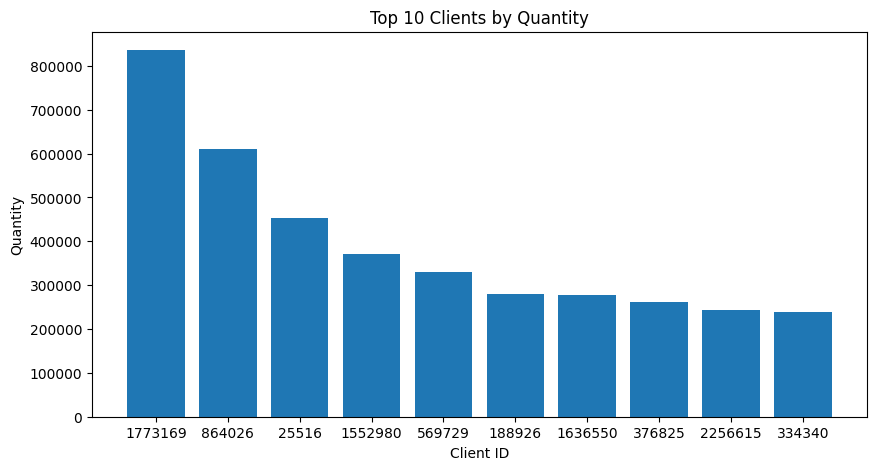

In [66]:
# Plot the bar plot
plt.figure(figsize=(10,5))
plt.bar(top10['client_id'], top10['quantity'])
plt.xlabel('Client ID')
plt.ylabel('Quantity')
plt.title('Top 10 Clients by Quantity')
#plt.xticks(top10['client_id'].index, top10['client_id'], rotation=45)
plt.show()

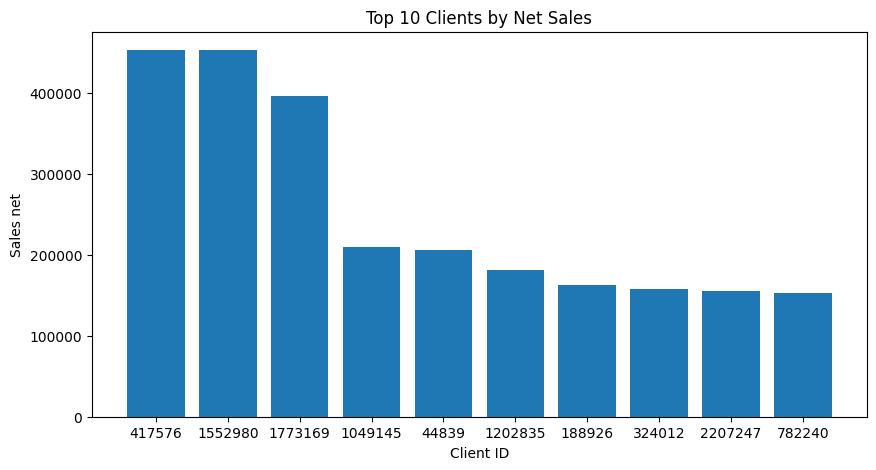

In [67]:
# Group the data by client_id
group_sales = df.groupby('client_id')['sales_net'].sum().reset_index(name='sales_net')

# Get the top 10 clients based on the total sales_net
top10_sales = group_sales.nlargest(10, 'sales_net')

top10_sales['client_id'] = top10_sales['client_id'].astype(str)

# Plot the bar plot
plt.figure(figsize=(10,5))
plt.bar(top10_sales['client_id'], top10_sales['sales_net'])
plt.xlabel('Client ID')
plt.ylabel('Sales net')
plt.title('Top 10 Clients by Net Sales')
plt.show()


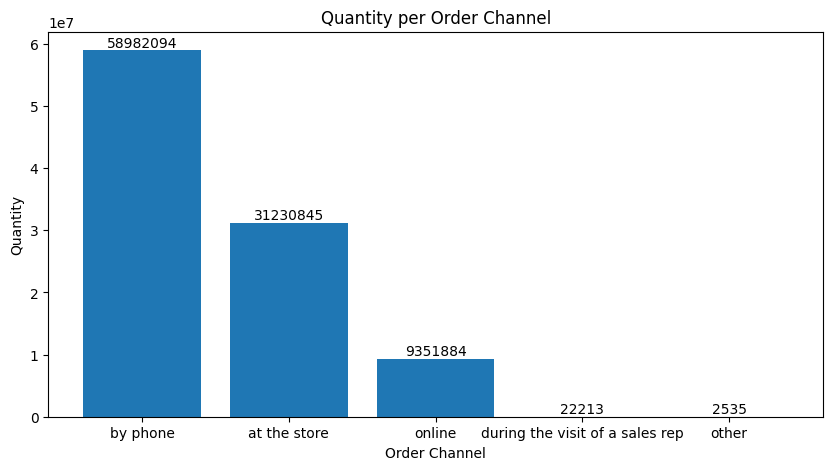

In [17]:
# Group the data by channel
group_channel = df.groupby('order_channel')['quantity'].sum().reset_index(name='quantity')
# Sort the dataframe by quantity in descending order
group_channel = group_channel.sort_values(by='quantity', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10,5))
bars = plt.bar(group_channel['order_channel'], group_channel['quantity'])
plt.xlabel('Order Channel')
plt.ylabel('Quantity')
plt.title('Quantity per Order Channel')

# Add the sum quantity as a label above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()


In [71]:
group_channel

,order_channel,quantity
0,at the store,31230845
1,by phone,58982094
2,during the visit of a sales rep,22213
3,online,9351884
4,other,2535


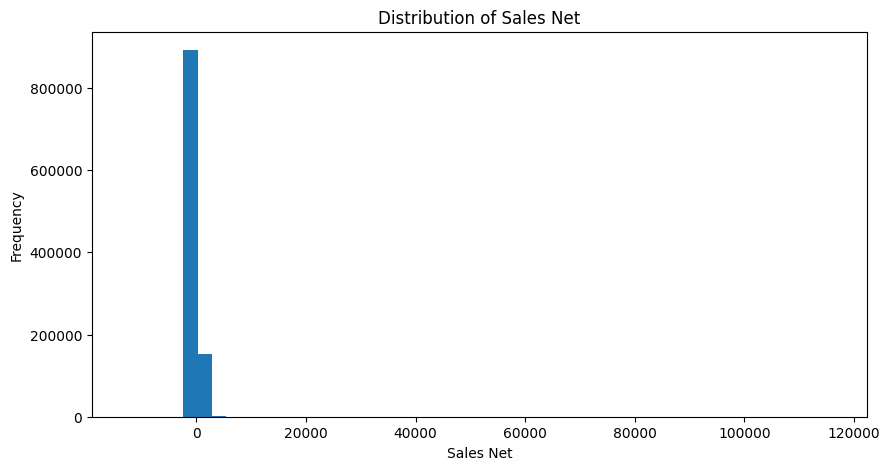

In [12]:
## Distribution sales_net

# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(df['sales_net'], bins=50)
plt.xlabel('Sales Net')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Net')
plt.show()


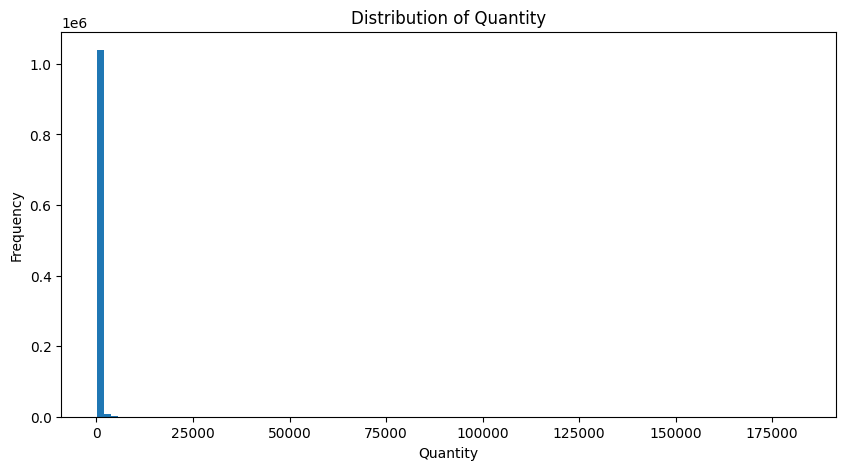

In [14]:
## Distribution of quantity values:

# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(df['quantity'], bins=100)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()


In [16]:
# Group the data by client_id
group_client = df.groupby('client_id')['sales_net'].sum().reset_index(name='sales_net')
group_client['client_id'] = group_client['client_id'].astype(str)

# Plot the bar plot
plt.figure(figsize=(10,5))
plt.bar(group_client['client_id'], group_client['sales_net'])
plt.xlabel('Client ID')
plt.ylabel('Sales Net')
plt.title('Sales per Client')
plt.show()


KeyboardInterrupt: 

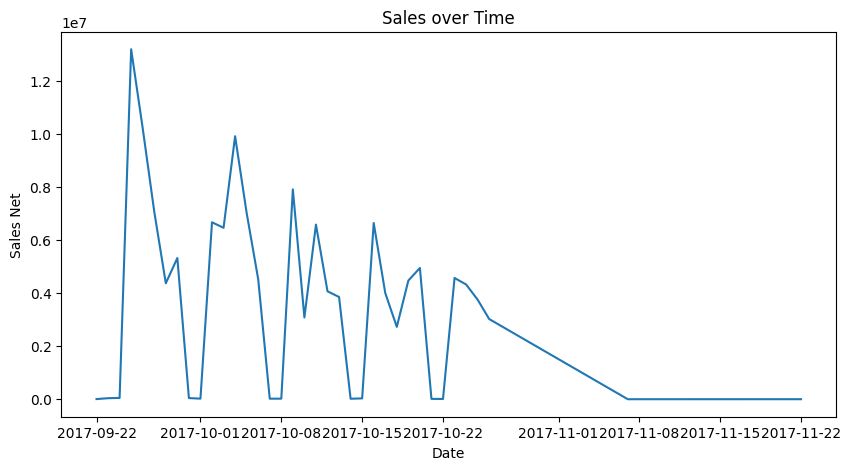

In [18]:
# Group the data by date
group_date = df.groupby('date_order')['sales_net'].sum().reset_index(name='sales_net')
group_date['date_order'] = pd.to_datetime(group_date['date_order'])

# Plot the line plot
plt.figure(figsize=(10,5))
plt.plot(group_date['date_order'], group_date['sales_net'])
plt.xlabel('Date')
plt.ylabel('Sales Net')
plt.title('Sales over Time')
plt.show()


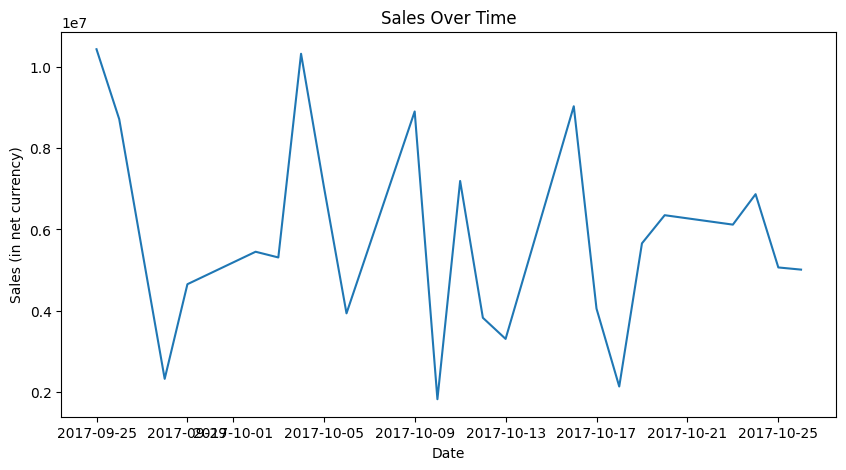

In [19]:
df_filtered = df[df['date_invoice'] >= '2017-09-22']
grouped_sales = df_filtered.groupby('date_invoice')['sales_net'].sum()
grouped_quantity = df_filtered.groupby('date_invoice')['quantity'].sum()

plt.figure(figsize=(10,5))
plt.plot(grouped_sales, label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales (in net currency)')
plt.title('Sales Over Time')
plt.show()

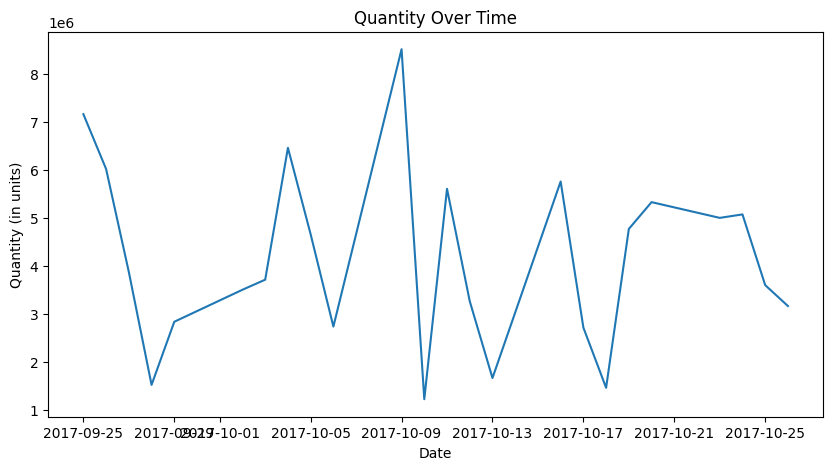

In [20]:
plt.figure(figsize=(10,5))
plt.plot(grouped_quantity, label='Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity (in units)')
plt.title('Quantity Over Time')
plt.show()

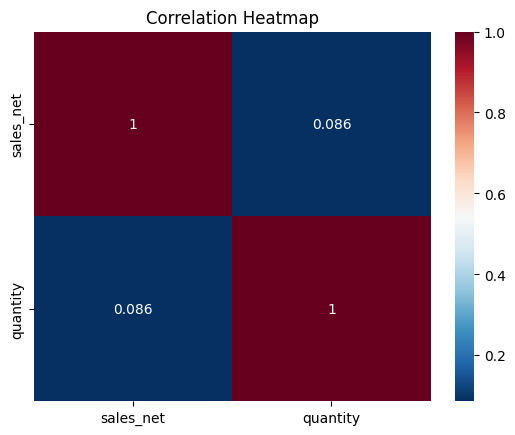

In [21]:
import seaborn as sns

# Create a correlation matrix
corr = df.drop(['date_order','date_invoice','product_id','client_id','order_channel','branch_id'], axis=1).corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.title('Correlation Heatmap')
plt.show()


# Clustering

## Pre Processing

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
# Encode categorical features
df = pd.get_dummies(df, columns=["order_channel"])

In [24]:
# Scale numerical features
numerical_features = ["sales_net", "quantity"]
df[numerical_features] = StandardScaler().fit_transform(df[numerical_features])

## Clustering

In [29]:
# Create the clustering model
kmeans = KMeans(n_clusters=5)

# Aggregate the data by client_id
df_agg = df.groupby("client_id").mean()

# Fit the KMeans model on the aggregated data
kmeans.fit(df_agg)


C:\Temp\ipykernel_14548\545820739.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby("client_id").mean()


KMeans(n_clusters=5)

In [31]:
# Predict the cluster labels for each client in the original data
df_agg["cluster"] = kmeans.predict(df_agg)

In [32]:
# Group the data by cluster to see the cluster statistics
cluster_grouped = df_agg.groupby("cluster").mean()

In [33]:
cluster_grouped

,product_id,sales_net,quantity,branch_id,order_channel_at the store,order_channel_by phone,order_channel_during the visit of a sales rep,order_channel_online,order_channel_other
cluster,,,,,,,,,
0,1.608373e+06,0.028815,-0.006757,5562.166318,0.574358,0.370013,0.000640,0.053883,0.001106
1,2.724959e+06,0.240187,-0.018914,5579.575185,0.567491,0.387123,0.000652,0.026963,0.017772
2,5.150686e+05,0.133472,-0.033420,5642.969836,0.570723,0.401154,0.000100,0.027909,0.000114
3,2.026122e+06,0.085989,-0.000655,5574.691954,0.592677,0.365543,0.000526,0.037098,0.004156
4,1.189118e+06,0.085484,0.010690,5548.628330,0.577139,0.379533,0.000461,0.041109,0.001758


In [34]:
df

,date_order,date_invoice,product_id,client_id,sales_net,quantity,branch_id,order_channel_at the store,order_channel_by phone,order_channel_during the visit of a sales rep,order_channel_online,order_channel_other
0,2017-09-25,2017-09-25,2376333,188502,0.052032,-0.120177,2732,0,0,0,1,0
1,2017-09-25,2017-09-25,2520527,835089,-0.265123,-0.120177,10279,1,0,0,0,0
2,2017-09-25,2017-09-25,2536756,1977896,0.531756,-0.096658,6184,0,0,0,1,0
3,2017-09-25,2017-09-25,3028673,598816,-0.282904,0.138532,4200,1,0,0,0,0
4,2017-09-25,2017-09-25,203377,2086861,2.191351,-0.120177,7051,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2017-09-26,2017-09-26,1723798,1007327,0.017800,-0.114950,9682,1,0,0,0,0
1048571,2017-09-26,2017-09-26,1648772,276000,-0.255806,-0.120177,379,1,0,0,0,0
1048572,2017-09-26,2017-09-26,1741706,1878701,-0.000281,-0.120177,4552,1,0,0,0,0
1048573,2017-09-26,2017-09-26,2226235,2150270,-0.214257,-0.120177,7101,1,0,0,0,0


# Forecasting

In [47]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Convert date columns to datetime
df['date_order'] = pd.to_datetime(df['date_order'])
df['date_invoice'] = pd.to_datetime(df['date_invoice'])

In [53]:
# Set date_order as index
df_model = df.set_index('date_order')

# Group the data by date
df_grouped = df_model.resample('D').sum()

C:\Temp\ipykernel_14548\919787278.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_model.resample('D').sum()


In [55]:
# Create the training and testing datasets
train_data = df_grouped[:int(0.8*(len(df_grouped)))]
test_data = df_grouped[int(0.8*(len(df_grouped))):]

In [57]:
# Fit the ARIMA model to the training data
model = ARIMA(train_data['sales_net'], order=(1,1,0))
model_fit = model.fit()

In [58]:
# Forecast the sales_net for the test data
forecast = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')


In [59]:
# Evaluate the performance of the ARIMA model
mse = mean_squared_error(test_data['sales_net'], forecast)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.925618422922241


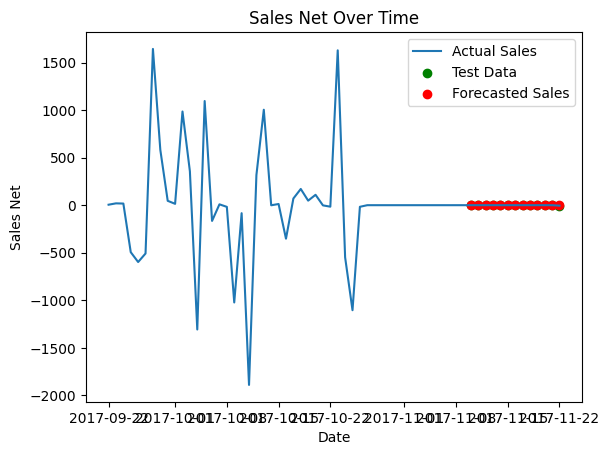

In [61]:
# Plot the sales_net over time
plt.plot(df_grouped['sales_net'], label='Actual Sales')
plt.scatter(test_data.index, test_data['sales_net'], label='Test Data', color='green')
plt.scatter(test_data.index, forecast, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales Net')
plt.title('Sales Net Over Time')
plt.legend()
plt.show()


In [63]:
#load data

df = pd.read_excel(data_path+'transactions_data.xlsx')

In [4]:
# Convert date columns to datetime format
df['date_order'] = pd.to_datetime(df['date_order'], format='%Y-%m-%d')
df['date_invoice'] = pd.to_datetime(df['date_invoice'], format='%Y-%m-%d')

# Extract features
df['day_of_week'] = df['date_order'].dt.dayofweek
df['month'] = df['date_order'].dt.month
df['year'] = df['date_order'].dt.year

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['order_channel', 'branch_id'])

In [6]:
# Split the data into features and target
X = df.drop(['sales_net', 'date_order', 'date_invoice'], axis=1)
y = df['sales_net']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Scale the features
scaler = StandardScaler()
X_train['quantity'] = scaler.fit_transform(X_train[['quantity']])

In [8]:
X_test['quantity'] = scaler.fit_transform(X_test[['quantity']])

In [11]:
# Train a XGBoost Regressor
model = XGBRegressor()
model.fit(X_train, y_train)

MemoryError: Unable to allocate 3.34 GiB for an array with shape (535, 838860) and data type float64

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("R2 Score: ", r2)

## Rule Based Model

In [3]:
#load data

df = pd.read_csv(data_path+'sub_df.csv')
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-12-04,2017-12-19,728963,537935,78.53235,17,by phone,8281
1,2019-06-18,2019-06-18,153024,720868,236.65528,41,at the store,10891
2,2019-04-24,2019-04-24,63638,1099886,29.55960,9,at the store,4471
3,2018-02-21,2018-02-21,2452526,1904292,117.53460,9,online,5489
4,2019-01-16,2019-02-07,1094311,513380,651.85680,3,by phone,9220


In [7]:
def count_orders_per_client(df):
    """
    Count the number of orders for each client in the given dataframe.

    Args:
    df (pandas.DataFrame): The dataframe containing the client information.

    Returns:
    pandas.DataFrame: A dataframe containing the client_id and the order_number for each client.
    """
    df_grouped = df.sort_values(by=['client_id', 'date_order'])
    df_grouped['order_number'] = df_grouped.groupby('client_id')['date_order'].transform(lambda x: (x != x.shift()).cumsum())
    df_grouped = df_grouped[df_grouped.groupby('client_id')['order_number'].transform('size') > 1]
    return df_grouped


In [8]:
df_grouped = count_orders_per_client(df)
df_grouped

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,order_number
1050002,2017-09-26,2017-09-27,2310611,14,160.135200,3,online,10319,1
1814466,2017-09-26,2017-09-26,2927672,14,105.763200,3,online,10319,1
1392104,2017-09-27,2017-10-18,107124,14,372.454333,13,by phone,10319,2
518047,2017-10-02,2017-10-09,738349,14,1.628400,3,by phone,10319,3
1303508,2017-10-03,2017-10-03,1095180,14,199.078800,3,by phone,10319,4
...,...,...,...,...,...,...,...,...,...
1237215,2019-06-04,2019-06-04,2030665,2274410,36.984000,201,at the store,2708,14
1042291,2017-11-01,2017-11-01,695452,2274517,69.320160,21,by phone,8488,1
776846,2018-06-27,2018-06-27,1452150,2274517,340.731545,161,by phone,8488,2
1272045,2018-08-16,2018-08-20,1452150,2274517,150.254663,71,by phone,8488,3


In [11]:
def compute_time_difference_between_orders(df):
    """
    Computes the time difference between orders for a given client.

    Parameters:
    df (DataFrame): The input DataFrame containing the transaction data.

    Returns:
    DataFrame: A DataFrame containing the time difference between orders for each client, sorted by client_id and date_order.

    """
    df['date_order'] = pd.to_datetime(df['date_order'])
    df = df.sort_values(by=['client_id', 'date_order'])
    df['time_diff'] = df.groupby('client_id')['date_order'].diff().dt.total_seconds()/(24*60*60)
    return df


In [12]:
df_time = compute_time_difference_between_orders(df_grouped)
df_time

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,order_number,time_diff
1050002,2017-09-26,2017-09-27,2310611,14,160.135200,3,online,10319,1,NaN
1814466,2017-09-26,2017-09-26,2927672,14,105.763200,3,online,10319,1,0.0
1392104,2017-09-27,2017-10-18,107124,14,372.454333,13,by phone,10319,2,1.0
518047,2017-10-02,2017-10-09,738349,14,1.628400,3,by phone,10319,3,5.0
1303508,2017-10-03,2017-10-03,1095180,14,199.078800,3,by phone,10319,4,1.0
...,...,...,...,...,...,...,...,...,...,...
1237215,2019-06-04,2019-06-04,2030665,2274410,36.984000,201,at the store,2708,14,0.0
1042291,2017-11-01,2017-11-01,695452,2274517,69.320160,21,by phone,8488,1,NaN
776846,2018-06-27,2018-06-27,1452150,2274517,340.731545,161,by phone,8488,2,238.0
1272045,2018-08-16,2018-08-20,1452150,2274517,150.254663,71,by phone,8488,3,50.0
